In [1]:
from json import load
from matplotlib import rc
from matplotlib import pyplot as plt

In [2]:
specie:str = 'yeast'
chromosome:str = '1'
folder:str = '/home/sidubois/Data_pangenomes/graph_comparison_paper/json_results'
reference_sequence:str = 'CASBJU01'

edition_results:dict = load(open(f'{folder}/{specie}_chr{chromosome}_edition_results.json', 'r'))
kmer_results:dict = load(open(f'{folder}/{specie}_chr{chromosome}_kmer_results.json', 'r'))
trf_results:dict = load(open(f'{folder}/{specie}_chr{chromosome}_trf_results.json', 'r'))
vcf_results:dict = load(open(f'{folder}/{specie}_chr{chromosome}_vcf_results.json', 'r'))

In [3]:
sampling: int = len(edition_results['editions'][reference_sequence])
reference_length: int = edition_results['lengths'][reference_sequence]
ratios:float = edition_results['ratios'][reference_sequence]

font = {'size': 20}
rc('font', **font)
kb:int = 1000

# Colorblind-friendly palette
colors:dict[str,str] = {
    'blue':    '#377eb8', 
    'orange':  '#ff7f00',
    'green':   '#4daf4a',
    'pink':    '#f781bf',
    'brown':   '#a65628',
    'purple':  '#984ea3',
    'gray':    '#999999',
    'red':     '#e41a1c',
    'yellow':  '#dede00'
}

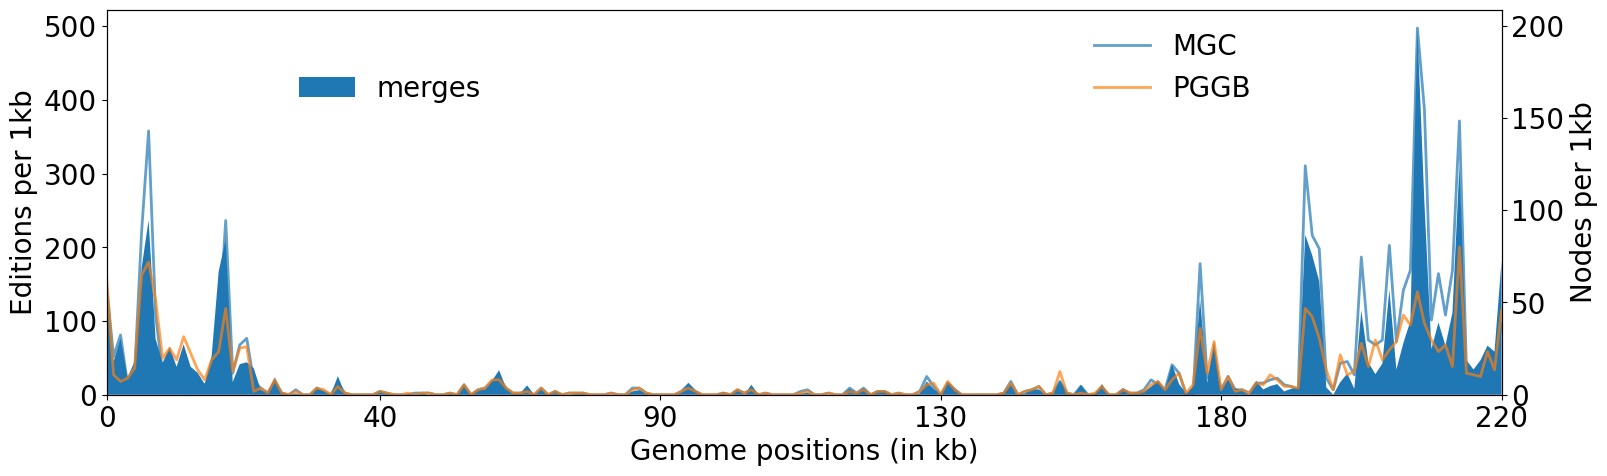

<Figure size 640x480 with 0 Axes>

In [4]:
fig, ax = plt.subplots(figsize=(18,5))
#fig.suptitle(f"Distribution of variants between graphs from MGC and PGGB for chromosom {chromosom}")
#fig.supylabel(f'Variants per {round((reference_length/200)/1000)}kb.')
ax.fill_between(list(range(sampling)),[ce/(reference_length/sampling)*kb for ce in edition_results['editions'][reference_sequence]], label='merges')
#ax.fill_between(list(range(sampling)),[cs/(reference_length/sampling)*kb for cs in counts_splits], color=colors['purple'], label='splits')
ax.set_ylabel(f'Editions per 1kb')
#ax.set_xticklabels([round(__/ratios) if not __%20 else '' for __ in range(sampling)])
ax.set_xlabel(f'Genome positions (in kb)')
ax.legend(loc=(.13,.73),frameon=False)
ax.set_xlim(left=0,right=sampling-1)
ax.set_ylim(bottom=0)
axb = ax.twinx()
axb.set_ylabel(f'Nodes per 1kb')
axb.set_xticks([0]+[__-1 for __ in range(1,sampling+2) if not __%40])
axb.set_xticklabels(['0']+[int(round(__/ratios,-4)/1000) for __ in range(1,sampling+2) if not __%40])
#axb.plot([nc/(reference_length/sampling)*kb for nc in counts_nodes_cactus],color=colors['red'], label='MGC',linewidth=2, alpha=.7) # ,linestyle='dashed'
#axb.plot([np/(reference_length/sampling)*kb for np in counts_nodes_pggb],color=colors['orange'], label='PGGB',linewidth=2, alpha=.7)
axb.plot([nc/(reference_length/sampling)*kb for nc in vcf_results['private_variants_A']], label='MGC',linewidth=2, alpha=.7)
axb.plot([nc/(reference_length/sampling)*kb for nc in vcf_results['private_variants_B']], label='PGGB',linewidth=2, alpha=.7)
#axb.plot([nc/(reference_length/sampling)*kb for nc in trf_results['tandem_repeats']],color='r', label='TR',linewidth=2, alpha=.7)
#axb.plot([nc/(reference_length/sampling)*kb for nc in kmer_results['unique_kmers']],color='r', label='kmers',linewidth=2, alpha=.7)
axb.legend(loc=(.7,.73),frameon=False)
axb.set_xlim(left=0,right=sampling-1)
axb.set_ylim(bottom=0)
plt.show()
plt.clf()

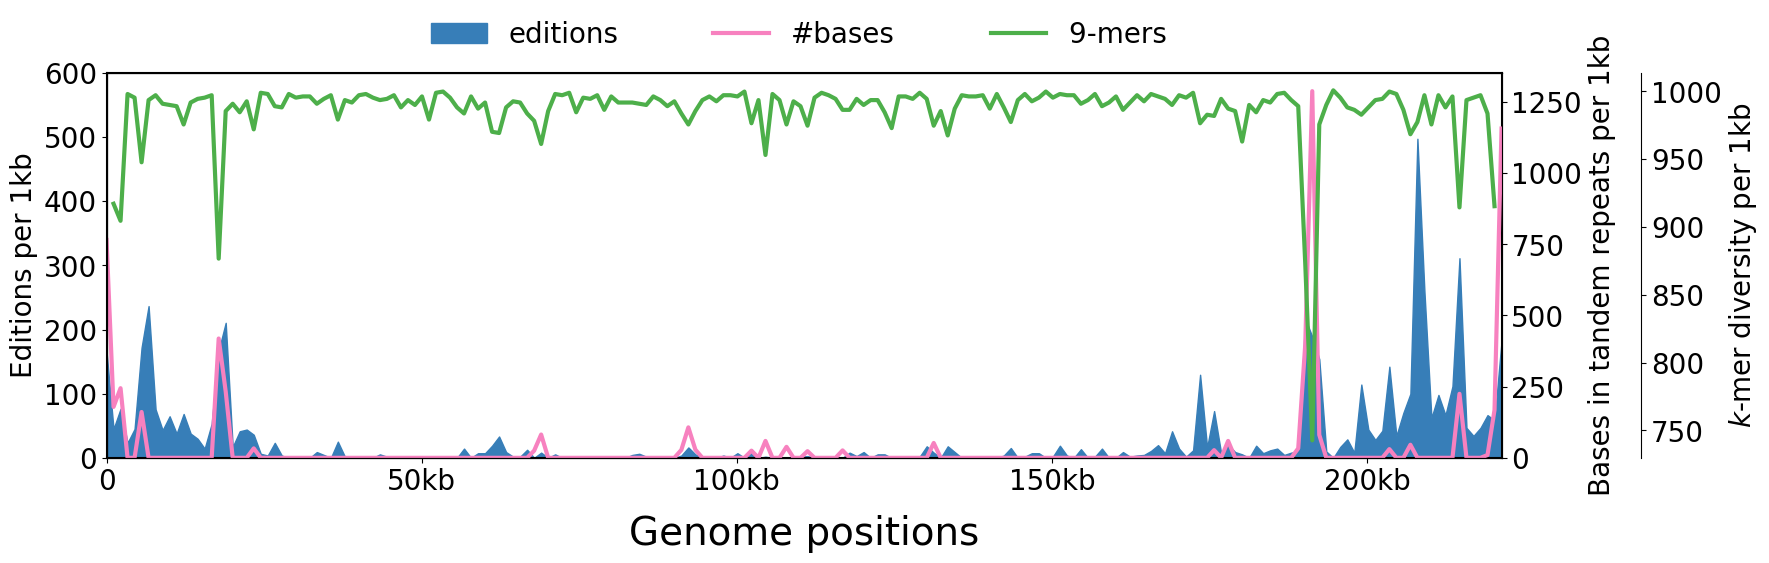

<Figure size 640x480 with 0 Axes>

In [10]:
microsat:list = trf_results['tandem_repeats']
kmers:list = kmer_results['unique_kmers']
ksize:int = kmer_results['ksize']

fig, ax = plt.subplots(figsize=(18,5))

#ax.set_title(f"Genomic features for {specie} chromosome {chromosome} - {reference_sequence}", y=-0.23)
#plt.text(20, -0.01, f"Genomic features for {specie} chromosome {chromosome} - {reference_sequence}")

ax.fill_between(list(range(sampling)),[ce/(reference_length/sampling)*kb for ce in edition_results['editions'][reference_sequence]], color=colors['blue'], label='editions')
ax.set_ylabel(f'Editions per 1kb')
ax.legend(bbox_to_anchor=(0.3, 1.2), loc='upper center',frameon=False)
ax.set_xlim(left=0,right=sampling-1)
ax.set_ylim(bottom=0,top=600)

axb = ax.twinx()

axb.plot([x/(reference_length/sampling)*kb for x in microsat],color=colors['pink'], label=f'#bases',linewidth=3)
correct_positions:list = [y for y in range(0,reference_length) if y % 5e4 == 0]
xticks_positions:list = [(x/reference_length)*sampling for x in correct_positions]
mb_labels = [f'{int(x/1e3)}kb' if x !=0 else 0 for x in correct_positions]
axb.set_xticks(xticks_positions,mb_labels)
axb.set_ylabel(f'Bases in tandem repeats per 1kb')

axc = ax.twinx()
axc.plot([None]+[x/(reference_length/sampling)*kb for x in kmers][1:-1]+[None],color=colors['green'], label=f'{ksize}-mers ',linewidth=3)

[x.set_linewidth(1.5) for x in ax.spines.values()]
axc.set_ylabel(f'$k$-mer diversity per 1kb')
axc.spines["right"].set_position(("axes", 1.10))
axb.legend(bbox_to_anchor=(0.5, 1.2), loc='upper center',frameon=False)
axc.legend(bbox_to_anchor=(0.7, 1.2), loc='upper center',frameon=False)
axb.set_xlim(left=0,right=sampling-1)
axb.set_ylim(bottom=0)
ax.set_xlabel(f'Genome positions', fontsize = 28, labelpad=14)

plt.show()
plt.clf()

In [6]:
# Spearman correlation for editions and tandem repeats
from scipy.stats import spearmanr

ratio, pvalue = spearmanr(edition_results['editions'][reference_sequence],trf_results['tandem_repeats'])
print(f"Correlation between editions and tandem repeats: {ratio} with p-value {pvalue}")

# Spearman correlation for editions and kmers
ratio, pvalue = spearmanr(edition_results['editions'][reference_sequence],[1000-x for x in kmer_results['unique_kmers']])
print(f"Correlation between editions and kmers: {ratio} with p-value {pvalue}")

Correlation between editions and tandem repeats: 0.35402290894492566 with p-value 2.706889973790173e-07
Correlation between editions and kmers: 0.3985608724787721 with p-value 5.060209900790746e-09


In [7]:
# Correlation between editions and private variants
ratio, pvalue = spearmanr(edition_results['editions'][reference_sequence],[vcf_results['private_variants_A'][i]+vcf_results['private_variants_B'][i] for i in range(sampling)])
print(f"Correlation between editions and private variants: {ratio} with p-value {pvalue}")

# Correlation between editions and shared variants
ratio, pvalue = spearmanr(edition_results['editions'][reference_sequence],vcf_results['shared_variants'])
print(f"Correlation between editions and shared variants: {ratio} with p-value {pvalue}")

Correlation between editions and private variants: 0.970120155725849 with p-value 9.623459346177024e-124
Correlation between editions and shared variants: 0.4089119463276001 with p-value 1.8377154592424752e-09
